In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'

In [2]:
mydata= pd.read_csv('data.txt',sep='	',header=None,names=['type1','type2','class'])

In [3]:
mydata.head()

,type1,type2,class
0,-0.017612,14.053064,0
1,-1.395634,4.662541,1
2,-0.752157,6.538620,0
3,-1.322371,7.152853,0
4,0.423363,11.054677,0


In [4]:
mydata.shape
type(mydata)
mydata['class'].value_counts()

(100, 3)

pandas.core.frame.DataFrame

1    53
0    47
Name: class, dtype: int64

# #sigmoid函数

In [5]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

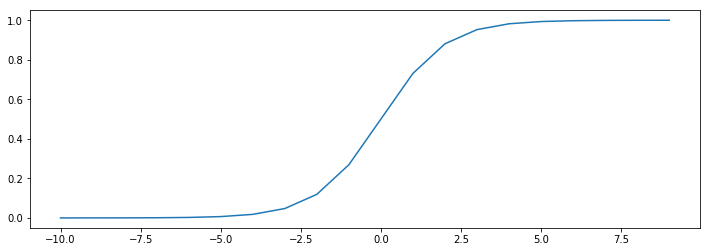

In [6]:
nums=np.arange(-10,10,step=1)
fig,ax=plt.subplots(figsize=(12,4))
ax.plot(nums,sigmoid(nums))

In [7]:
def model(theta, X):
    z = np.sum(theta.T * X, axis=1)
    return sigmoid(z)

In [8]:
def cross_entropy(y, y_hat):
    n_samples = y.shape[0]
    return sum(-y*np.log(y_hat)-(1-y)*np.log(1-y_hat))/n_samples

In [9]:
def cost_function(theta, X, y):
    y_hat = model(theta, X)
    return cross_entropy(y, y_hat)

# theta是numpy.ndarray(3,1)，z是一个series格式的数推出y_hat也是，通过np.array(y_plus).reshape(100,1)转化为ndarray（100,1），只有这种格式才能和dataframe相乘并广播，结果为dataframe，然后在求和转化为series

In [10]:
def optimize(theta,X,y):
    n = X.shape[0]
    alpha = 1e-2
    y_hat = model(theta,X)
    y_plus=y_hat-y#series对象
    y_plus=np.array(y_plus).reshape(100,1)
    dtheta = (1.0/n) * ((y_plus)*X)
    dtheta = np.sum(dtheta, axis=0)
    dtheta=np.array(dtheta).reshape(3,1)
    theta = theta - alpha * dtheta
    return theta

In [11]:
def predict_proba(theta, X):
    y_hat=model(theta, X)
    return y_hat

def predict(X, theta):
    y_hat=predict_proba(theta,X)
    y_hard=(y_hat > 0.5) * 1#y_hard为算出来结果大于0.5的y_hat项，并转化成1,0
    return y_hard

def accuracy(theta, X, y):
    y_hard=predict(X, theta)
    count_right=sum(y_hard == y)
    return count_right*1.0/len(y)

In [12]:
def iterate(theta,X,y,times):
    costs = []
    accs = []
    for i in range(times):
        theta = optimize(theta,X,y)
        costs.append(cost_function(theta, X, y))
        accs.append(accuracy(theta, X, y))

    return theta, costs, accs

In [13]:
X=mydata.iloc[:,:-1]
y=np.array(mydata.iloc[:,-1].values)
n_features = X.shape[1]

# 建议做标准化处理，但无法可视化

In [14]:
std=X.std(axis=0)
mean=X.mean(axis=0)
X_norm = (X - mean) / std·

In [15]:
X.insert(0,'ones',np.ones(X.shape[0]))#第一列添加X.shape[0]个1

In [16]:
theta = np.ones((n_features+1,1))#np.adarray格式

In [17]:
theta, costs, accs = iterate(theta, X, y, 1500)

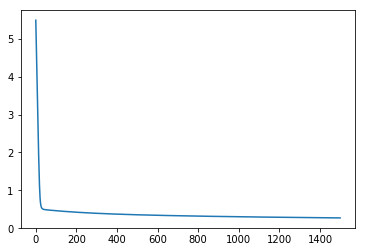

In [18]:
plt.plot(costs)

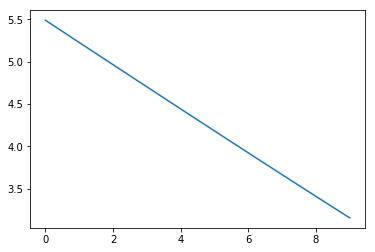

In [19]:
plt.plot(costs[:10])

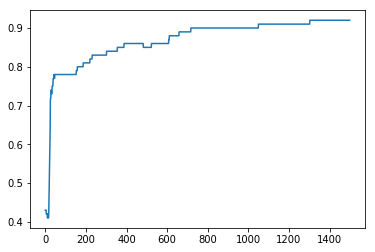

In [20]:
plt.plot(accs)

In [21]:
print(costs[-1], accs[-1])

0.27170362424898403 0.92


# 标准化后的图无法显示分割

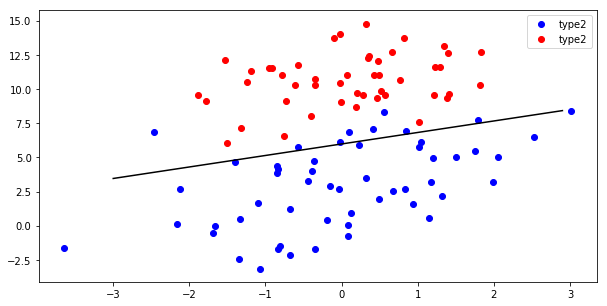

In [22]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(10,5))
ax.scatter(mydata[mydata['class']==1]['type1'],mydata[mydata['class']==1]['type2'],c='b')
ax.scatter(mydata[mydata['class']==0]['type1'],mydata[mydata['class']==0]['type2'],c='r')
x1 =np.arange (-3.0, 3, 0.1)
x2 = (-theta[0]-theta[1]*x1)/theta[2]
ax.plot(x1,x2,color = 'black')
ax.legend()

In [23]:
print(accs[-1])

0.92


# 使用sklearn进行

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [25]:
X=mydata.iloc[:,:-1]
y=mydata.iloc[:,-1]
X.insert(0,'ones',np.ones(X.shape[0]))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=12345)

In [26]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
lr.score(X_train, y_train)

0.9571428571428572

In [28]:
lr.score(X_test, y_test)

0.9333333333333333

In [42]:
lr.score(X, y)

0.95

# coef_为theta_i     ,intercept_为theta_0

In [29]:
lr.intercept_

array([2.20474714])

In [30]:
lr.coef_[0]

array([ 2.20474714,  0.43728204, -0.60936483])

In [39]:
data_compare = pd.DataFrame()
data_compare['features'] = np.hstack((['ones'], mydata.columns[:-1]))
data_compare['sklearn'] = lr.coef_[0]
data_compare['mine'] = (theta) 

In [40]:
data_compare

,features,sklearn,mine
0,ones,2.204747,2.447877
1,type1,0.437282,0.344105
2,type2,-0.609365,-0.409000
